In [2]:
import numpy as np # 数据处理最重要的模块
import pandas as pd # 数据处理最重要的模块
import scipy.stats as stats # 统计模块
import scipy
from functools import reduce
# import pymysql  # 导入数据库模块

from datetime import datetime # 时间模块
import statsmodels.formula.api as smf  # OLS regression

# import pyreadr # read RDS file

from matplotlib import style
import matplotlib.pyplot as plt  # 画图模块
import matplotlib.dates as mdates


from matplotlib.font_manager import FontProperties # 作图中文
from pylab import mpl
#mpl.rcParams['font.sans-serif'] = ['SimHei']
#plt.rcParams['font.family'] = 'Times New Roman'


#输出矢量图 渲染矢量图
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

from IPython.core.interactiveshell import InteractiveShell # jupyter运行输出的模块
#显示每一个运行结果
InteractiveShell.ast_node_interactivity = 'all'

#设置行不限制数量
# pd.set_option('display.max_rows',None)

#设置列不限制数量
pd.set_option('display.max_columns', None)

## 导入数据并处理

In [3]:
#导入数据，设置索引并用MAD法处理异常值
data_new = pd.read_csv(r"C:\Users\DELL\Desktop\US stock market return.csv",sep = ',')#导入数据
data_new['Day'] = pd.to_datetime(data_new['Day'],format = '%Y/%m/%d')
data_new.set_index('Day',inplace = True)
data_new=data_new['1999-01-01':'2023-12-31']#设置索引
median = np.median(data_new['r'])
MAD = np.mean(abs(data_new['r'] - median))
data_new[data_new['r'] >=  3 * MAD + median] = 3 * MAD + median
data_new[data_new['r'] <= -3 * MAD + median] = -3 * MAD + median#处理异常值
data_new

,r
Day,
1999-01-01,0.038447
1999-02-01,-0.038083
1999-03-01,0.037925
1999-04-01,0.049092
1999-05-01,-0.020708
...,...
2023-08-01,-0.020300
2023-09-01,-0.048003
2023-10-01,-0.029225


## 描述性统计

In [4]:
data_new['1999':'2023']['r'].describe()
rpiskew=data_new['r'].skew()
rpikurt=data_new['r'].kurt()
print("偏度为",rpiskew)
print("峰度为",rpikurt)

count    300.000000
mean       0.007705
std        0.044392
min       -0.092848
25%       -0.020705
50%        0.012332
75%        0.036898
max        0.117512
Name: r, dtype: float64

偏度为 -0.29952508954142054
峰度为 -0.021637139171023723


如结果所示，共选取了300个数据，均值约为0.77%，标准差约为0.044392，最小值为-0.0929484，最大值为0.117512，偏度约为-0.2995，峰度约为-0.0216。表明数据分布的左侧尾部较长，分布稍微向左倾斜，数据分布比正态分布更平坦，尾部更短。

## 统计检验

- $H_0: R = 0$
- $H_1 : R \neq 0$

In [5]:
stats.ttest_1samp(data_new['1999-01':]['r'],0)

TtestResult(statistic=3.0063932167908125, pvalue=0.0028679305097856714, df=299)

t=3.0064,p=0.0029<0.01,在1%的置信水平下拒绝H0，接受H1，即美国股票收益率与0有显著差异

## 图表展示
本文通过作频率分布直方图，核密度图以及时间趋势折现图对美国的股票收益率数据作可视化展示。其中频率分布直方图以及核密度图能够展示数据的分布形态，发现其集中与离散趋势；时间趋势折线图则能展示数据随时间变动的变化趋势，作为未来数据进行预测的基础。

<Axes: ylabel='Frequency'>

Text(0.5, 1.0, '美国股票收益率频率分布直方图')

Text(0.5, 0, '收益率')

Text(0, 0.5, '频数')

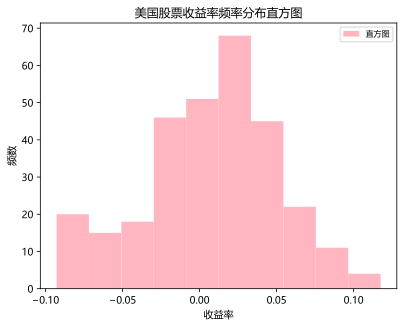

In [6]:
#频率分布直方图
data_new['r'].plot(kind = 'hist', bins = 10, color = 'lightpink', edgecolor = None, label = '直方图')

plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']
plt.title('美国股票收益率频率分布直方图')
plt.xlabel('收益率')
plt.ylabel('频数')
plt.legend(loc='upper right',fontsize = 8)
plt.show()

<Axes: ylabel='Density'>

Text(0.5, 1.0, '美国股票收益率核密度图')

Text(0.5, 0, '收益率')

Text(0, 0.5, '核密度')

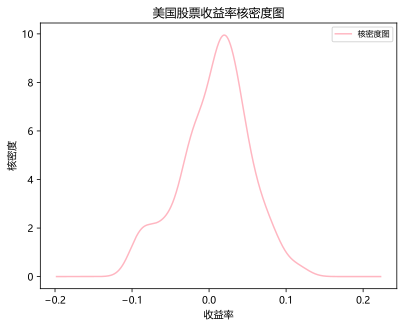

In [7]:
#核密度图
data_new['r'].plot(kind = 'kde',  color = 'lightpink', label = '核密度图')
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']
plt.title('美国股票收益率核密度图')
plt.xlabel('收益率')
plt.ylabel('核密度')
plt.legend(loc='upper right',fontsize = 8)
plt.show()

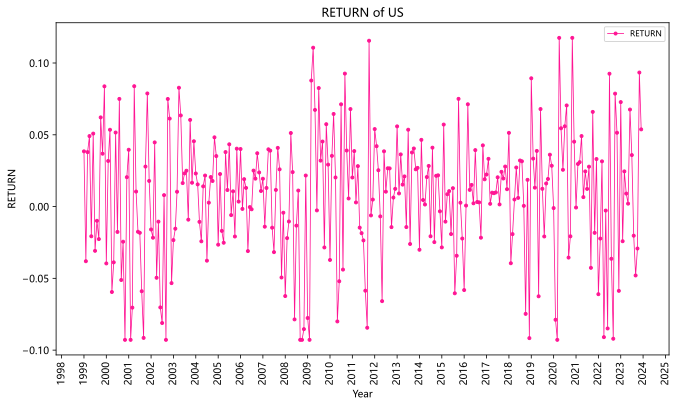

In [8]:
#时间趋势折线图
fig, ax = plt.subplots(figsize = (11,6))

ax.plot('r', # 图片数据
'.-', # 图片类型,
color = 'deeppink', # 图片颜色
label = 'RETURN', # 图片标签
linewidth = 0.8, # 图片线宽
data = data_new) # 图片数据来源
ax.set_title("RETURN of US") # 图片标题
ax.set_ylabel('RETURN') # 图片y轴标签
ax.set_xlabel('Year') # 图片x轴标签

# 设置x轴的日期显示格式
data_format = mdates.DateFormatter('%Y')
ax.xaxis.set_major_formatter(data_format)
ax.xaxis.set_major_locator(mdates.YearLocator())

# 转置x轴的日期显示格式
plt.xticks(rotation = 90)

# 添加图例
plt.legend(loc='upper right',fontsize = 8)
fig = plt.gcf()
fig.savefig('CPI.svg', bbox_inches='tight')
plt.show();

# 可预测性

CPI是衡量通货膨胀的关键指标，它反映了消费品和服务价格水平的变化，通货膨胀预期的上升或下降会影响投资者对利率的预期，进而影响股市表现；而UNRATE作为衡量经济健康的重要指标，其变化可以反映劳动力市场的状况，进而影响股市表现。因此我选择用CPI与UNRATE两个变量来预测美国股票市场的收益率

# CPI

# 经济学假设
CPI上升时意味着物价水平整体提高，可能会使得企业的销售收入及利润增加，进而推动股价上升，对股票收益率产生积极的影响；但同时，CPI上升意味着出现通货膨胀，政府可能会采取紧缩性货币政策，提高利率，使得企业融资成本上升，并使资金流向银行存款以及债券等固定收益资产，导致股价以及股票收益率降低。因此，本文对美国CPI对股票市场收益率的影响作如下经济学假设：

$$
R_t = α \pm β * CPI_{t-1} + ϵ_t
$$

## 原假设 β=0
## 备择假设 β≠0
- H1: β>0
- H2: β<0

## 描述性统计

In [9]:
#导入数据，设置索引并用MAD法处理异常值
data1 = pd.read_csv(r"C:\Users\DELL\Desktop\CPI.csv",sep = ',')
data1['Day'] = pd.to_datetime(data1['Day'],format = '%Y/%m/%d')
data1.set_index('Day',inplace = True)
data1 = data1['1999-01-01':'2023-12-31']
data1 = data1.replace(0,data1['CPI'].mean())
median = np.median(data1['CPI'])
MAD = np.mean(abs(data1['CPI'] - median))

data1[data1['CPI'] >=  3 * MAD + median] = 3 * MAD + median
data1[data1['CPI'] <= -3 * MAD + median] = -3 * MAD + median

data1

,CPI
Day,
1999-01-01,0.244051
1999-02-01,0.121729
1999-03-01,0.303951
1999-04-01,0.727273
1999-05-01,0.209868
...,...
2023-08-01,0.436716
2023-09-01,0.248513
2023-10-01,-0.038338


In [10]:
data1['1999':'2023']['CPI'].describe()
rpiskew=data1['CPI'].skew()
rpikurt=data1['CPI'].kurt()
print("偏度为",rpiskew)
print("峰度为",rpikurt)

count    300.000000
mean       0.219566
std        0.347225
min       -0.636921
25%        0.000196
50%        0.209868
75%        0.455783
max        1.056657
Name: CPI, dtype: float64

偏度为 -0.023993871659861273
峰度为 -0.04436289697137763


## 统计检验
- $H_0: CPI = 0$
- $H_1 : CPI \neq 0$

In [11]:
stats.ttest_1samp(data1['1999-01':]['CPI'],0)

TtestResult(statistic=10.952557914682542, pvalue=1.0716659683409183e-23, df=299)

t=10.9526,P=0.0000,拒绝H0，接受H1，即CPI与0有显著差异

## CPI数据时间趋势折线图

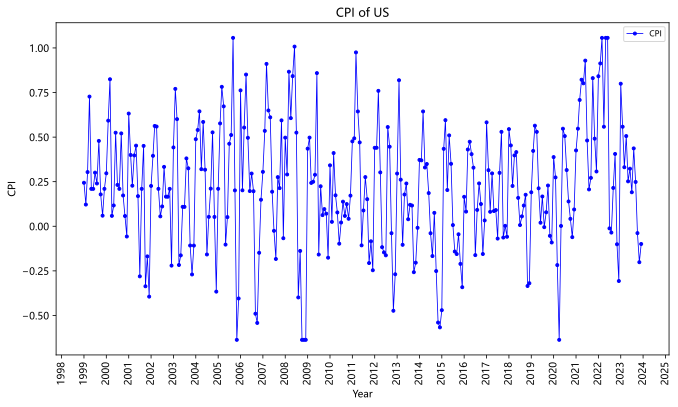

In [12]:
fig, ax = plt.subplots(figsize = (11,6))

ax.plot('CPI', # 图片数据
'.-', # 图片类型,
color = 'blue', # 图片颜色
label = 'CPI', # 图片标签
linewidth = 0.8, # 图片线宽
data = data1) # 图片数据来源
ax.set_title("CPI of US") # 图片标题
ax.set_ylabel('CPI') # 图片y轴标签
ax.set_xlabel('Year') # 图片x轴标签

# 设置x轴的日期显示格式
data_format = mdates.DateFormatter('%Y')
ax.xaxis.set_major_formatter(data_format)
ax.xaxis.set_major_locator(mdates.YearLocator())

# 转置x轴的日期显示格式
plt.xticks(rotation = 90)

# 添加图例
plt.legend(loc='upper right',fontsize = 8)
fig = plt.gcf()
fig.savefig('CPI.svg', bbox_inches='tight')
plt.show();

## CPI数据与收益率数据合并作图

In [13]:
dataframes1 = [data_new, data1,]
data_CPI = reduce(lambda left, right: pd.merge(left, right, on='Day'), dataframes1)
data_CPI

,r,CPI
Day,,
1999-01-01,0.038447,0.244051
1999-02-01,-0.038083,0.121729
1999-03-01,0.037925,0.303951
1999-04-01,0.049092,0.727273
1999-05-01,-0.020708,0.209868
...,...,...
2023-08-01,-0.020300,0.436716
2023-09-01,-0.048003,0.248513
2023-10-01,-0.029225,-0.038338


Text(0, 0.5, 'Return')

(array([ 9862., 10227., 10592., 10957., 11323., 11688., 12053., 12418.,
        12784., 13149., 13514., 13879., 14245., 14610., 14975., 15340.,
        15706., 16071., 16436., 16801., 17167., 17532., 17897., 18262.,
        18628., 18993., 19358., 19723., 20089.]),
 [Text(9862.0, 0, '1997'),
  Text(10227.0, 0, '1998'),
  Text(10592.0, 0, '1999'),
  Text(10957.0, 0, '2000'),
  Text(11323.0, 0, '2001'),
  Text(11688.0, 0, '2002'),
  Text(12053.0, 0, '2003'),
  Text(12418.0, 0, '2004'),
  Text(12784.0, 0, '2005'),
  Text(13149.0, 0, '2006'),
  Text(13514.0, 0, '2007'),
  Text(13879.0, 0, '2008'),
  Text(14245.0, 0, '2009'),
  Text(14610.0, 0, '2010'),
  Text(14975.0, 0, '2011'),
  Text(15340.0, 0, '2012'),
  Text(15706.0, 0, '2013'),
  Text(16071.0, 0, '2014'),
  Text(16436.0, 0, '2015'),
  Text(16801.0, 0, '2016'),
  Text(17167.0, 0, '2017'),
  Text(17532.0, 0, '2018'),
  Text(17897.0, 0, '2019'),
  Text(18262.0, 0, '2020'),
  Text(18628.0, 0, '2021'),
  Text(18993.0, 0, '2022'),
  Text(

Text(0, 0.5, 'CPI')

Text(0.5, 1.0, 'Return and CPI of US')

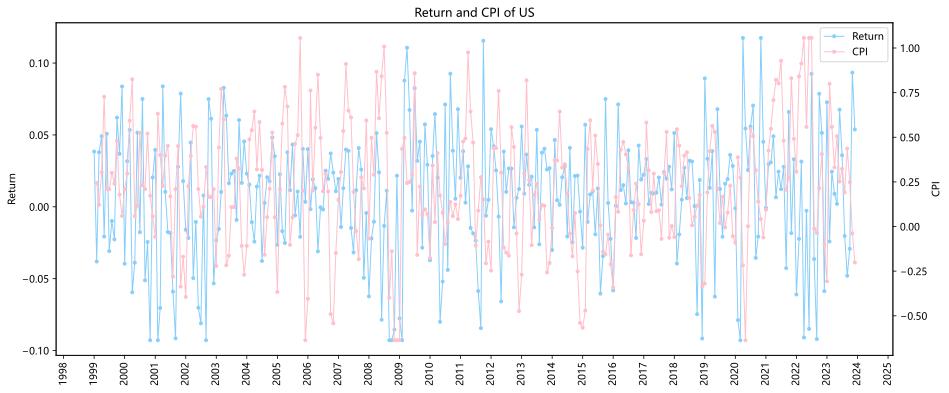

In [14]:
fig, ax1 = plt.subplots(figsize=(15, 6))

ax1.plot(data_CPI['r'], 
         label='Return', 
         color='lightskyblue', 
         linewidth=1, 
         linestyle='-', 
         marker='.')
ax1.set_ylabel('Return',color='black')

data_format = mdates.DateFormatter('%Y')
ax1.xaxis.set_major_formatter(data_format)
ax1.xaxis.set_major_locator(mdates.YearLocator())
plt.xticks(rotation=90)

ax2 = ax1.twinx()
ax2.plot(data_CPI['CPI'].shift(1), 
         label='CPI', 
         color='pink', 
         linewidth=1, 
         linestyle='-', 
         marker='.')
ax2.set_ylabel('CPI',color='black')

plt.title("Return and CPI of US")

lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper right')
fig = plt.gcf()
fig.savefig('return and cpi.svg', bbox_inches='tight')
plt.show()

## OLS回归

In [15]:
data_CPI['lcpi'] = data_CPI['CPI'].shift(1)
model_cpi = smf.ols('r ~lcpi', data=data_CPI['1999-01':'2023-12']).fit()
print(model_cpi.summary())

                            OLS Regression Results                            
Dep. Variable:                      r   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.7586
Date:                Fri, 20 Dec 2024   Prob (F-statistic):              0.384
Time:                        12:48:05   Log-Likelihood:                 507.65
No. Observations:                 299   AIC:                            -1011.
Df Residuals:                     297   BIC:                            -1004.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0090      0.003      2.963      0.0

从回归结果可以看出，美国CPI对美国股票市场收益率回归模型的p值为0.384，故可说明在美国股票市场收益率与CPI月度数据1999年1月到2023年12月共计299个样本观测值内，不能拒绝零假设，即美国CPI与美国股票市场收益率无显著关系

## 模型

$$
R_t =0.0902 -0.0653 *CPI_{t-1}
$$

## 模型拟合收益率 

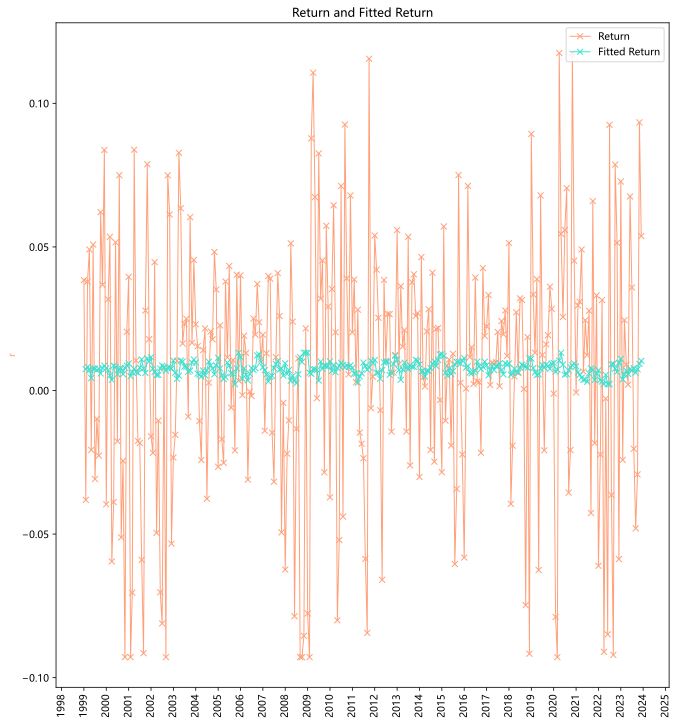

In [16]:
data_fit1 = data_CPI.copy()
data_fit1['fitted_return'] = model_cpi.fittedvalues

fig, ax1 = plt.subplots(figsize=(11, 12))
ax1.plot(data_fit1['r'],
            label='Return',
            color='lightsalmon',
            linewidth=1,
            linestyle='-',
            marker='x')
ax1.plot(data_fit1['fitted_return'],
            label='Fitted Return',
            color='turquoise',
            linewidth=1,
            linestyle='-',
            marker='x')


ax1.set_ylabel('r', color='lightsalmon')
data_format2 = mdates.DateFormatter('%Y')
ax1.xaxis.set_major_formatter(data_format2)
ax1.xaxis.set_major_locator(mdates.YearLocator())

plt.xticks(rotation=90)
plt.title('Return and Fitted Return')
plt.legend(loc='upper right')
fig = plt.gcf()
fig.savefig('return1.svg', bbox_inches='tight')
plt.show();


## 分析
CPI预测美国股票收益率结果不显著可能是由于模型的局限性、数据的复杂性以及外部冲击等多种因素共同作用的结果。可能存在其他影响股票收益率的重要变量没有被包括在模型中，这些遗漏的变量可能会影响CPI对股票收益率的预测能力；不同时间段内，CPI与股票收益率的关系可能存在差异。例如，在低通胀时期，CPI与股票收益率可能正相关，而在高通胀时期，这种关系可能变为负相关；股票市场经常受到外部冲击和事件的影响，如政策变化、自然灾害、地缘政治事件等，这些因素可能在短期内对股票收益率产生重大影响，而CPI可能无法捕捉这些影响
。


# 失业率

# 经济学假设
通常情况下，我们一般认为失业率上升会引发投资者对经济形势的负面预期，从而选择将资金从股票市场转移到国债等相对稳定的金融资产上，从而对股票收益率造成反向影响；但从另一角度来看，失业率上升时政府可能会采取扩张型货币政策，降低利率，从而对股价产生一定的支撑作用。因此，对美国失业率对股票收益率的影响作如下经济学假设：

$$
R_t = α \pm β * UNRATE_{t-1} + ϵ_t
$$

## 原假设 β=0
## 备择假设 β≠0
- H1: β>0
- H2: β<0

## 描述性统计

In [17]:
#导入数据，设置索引并用MAD法处理异常值
data2 = pd.read_csv(r"C:\Users\DELL\Desktop\失业率.csv",sep = ',')
data2['Day'] = pd.to_datetime(data2['Day'],format = '%Y/%m/%d')
data2.set_index('Day',inplace = True)
data2 = data2['1999-01-01':'2023-12-31']
data2 = data2.replace(0,data2['UNRATE'].mean())
median = np.median(data2['UNRATE'])
MAD = np.mean(abs(data2['UNRATE'] - median))

data2[data2['UNRATE'] >=  3 * MAD + median] = 3 * MAD + median
data2[data2['UNRATE'] <= -3 * MAD + median] = -3 * MAD + median

data2

,UNRATE
Day,
1999-01-01,4.3
1999-02-01,4.4
1999-03-01,4.2
1999-04-01,4.3
1999-05-01,4.2
...,...
2023-08-01,3.8
2023-09-01,3.8
2023-10-01,3.8


In [18]:
data2['1999':'2023']['UNRATE'].describe()
rpiskew=data2['UNRATE'].skew()
rpikurt=data2['UNRATE'].kurt()
print("偏度为",rpiskew)
print("峰度为",rpikurt)

count    300.000000
mean       5.651083
std        1.811893
min        3.400000
25%        4.200000
50%        5.100000
75%        6.425000
max        9.475000
Name: UNRATE, dtype: float64

偏度为 0.8843434789172471
峰度为 -0.3674328291406983


## 统计检验
- $H_0: UNRATE = 0$
- $H_1 : UNRATE \neq 0$

In [19]:
stats.ttest_1samp(data2['1999-01':]['UNRATE'],0)

TtestResult(statistic=54.02064538043737, pvalue=2.685589372156809e-156, df=299)

t=54.0206,p=0.0000,拒绝H0，接受H1，即失业率与0有显著差异

## 失业率和Return一起作图

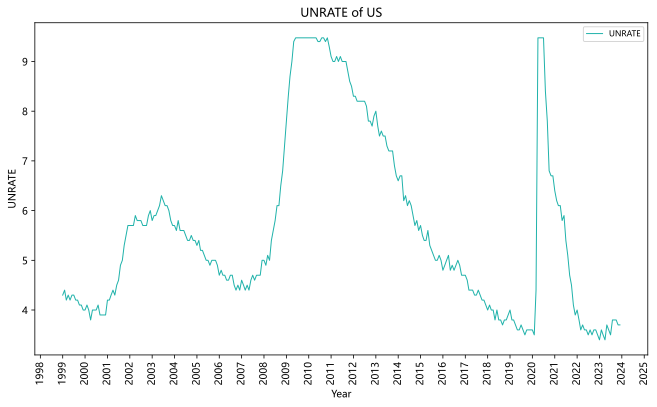

In [20]:
fig, ax = plt.subplots(figsize = (11,6))

ax.plot('UNRATE', # 图片数据
'-', # 图片类型,
color = 'lightseagreen', # 图片颜色
label = 'UNRATE', # 图片标签
linewidth = 1.0, # 图片线宽
data = data2) # 图片数据来源
ax.set_title("UNRATE of US") # 图片标题
ax.set_ylabel('UNRATE') # 图片y轴标签
ax.set_xlabel('Year') # 图片x轴标签

# 设置x轴的日期显示格式
data_format = mdates.DateFormatter('%Y')
ax.xaxis.set_major_formatter(data_format)
ax.xaxis.set_major_locator(mdates.YearLocator())

# 转置x轴的日期显示格式
plt.xticks(rotation = 90)

# 添加图例
plt.legend(loc='upper right',fontsize = 8)
fig = plt.gcf()
fig.savefig('UNRATE.svg', bbox_inches='tight')
plt.show();

In [21]:
dataframes2 = [data_new,data2]
data_UNRATE = reduce(lambda left, right: pd.merge(left, right, on='Day'), dataframes2)
data_UNRATE

,r,UNRATE
Day,,
1999-01-01,0.038447,4.3
1999-02-01,-0.038083,4.4
1999-03-01,0.037925,4.2
1999-04-01,0.049092,4.3
1999-05-01,-0.020708,4.2
...,...,...
2023-08-01,-0.020300,3.8
2023-09-01,-0.048003,3.8
2023-10-01,-0.029225,3.8


Text(0, 0.5, 'Return')

(array([ 9862., 10227., 10592., 10957., 11323., 11688., 12053., 12418.,
        12784., 13149., 13514., 13879., 14245., 14610., 14975., 15340.,
        15706., 16071., 16436., 16801., 17167., 17532., 17897., 18262.,
        18628., 18993., 19358., 19723., 20089.]),
 [Text(9862.0, 0, '1997'),
  Text(10227.0, 0, '1998'),
  Text(10592.0, 0, '1999'),
  Text(10957.0, 0, '2000'),
  Text(11323.0, 0, '2001'),
  Text(11688.0, 0, '2002'),
  Text(12053.0, 0, '2003'),
  Text(12418.0, 0, '2004'),
  Text(12784.0, 0, '2005'),
  Text(13149.0, 0, '2006'),
  Text(13514.0, 0, '2007'),
  Text(13879.0, 0, '2008'),
  Text(14245.0, 0, '2009'),
  Text(14610.0, 0, '2010'),
  Text(14975.0, 0, '2011'),
  Text(15340.0, 0, '2012'),
  Text(15706.0, 0, '2013'),
  Text(16071.0, 0, '2014'),
  Text(16436.0, 0, '2015'),
  Text(16801.0, 0, '2016'),
  Text(17167.0, 0, '2017'),
  Text(17532.0, 0, '2018'),
  Text(17897.0, 0, '2019'),
  Text(18262.0, 0, '2020'),
  Text(18628.0, 0, '2021'),
  Text(18993.0, 0, '2022'),
  Text(

Text(0, 0.5, 'UNRATE')

Text(0.5, 1.0, 'Return and UNRATE of US')

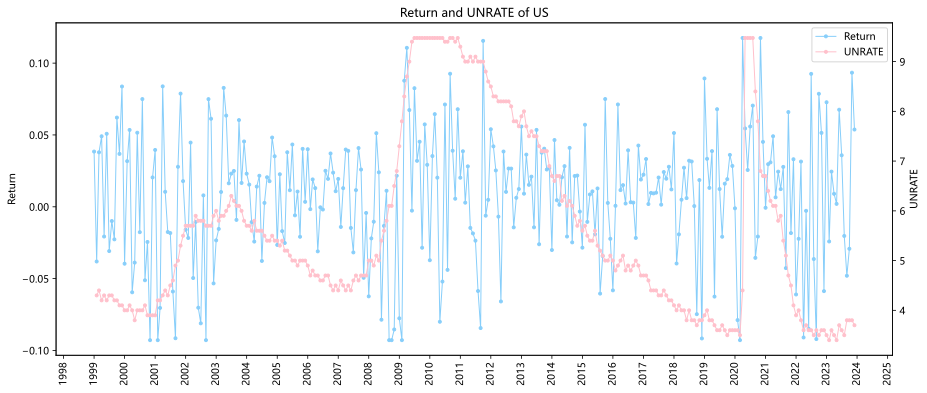

In [22]:
fig, ax1 = plt.subplots(figsize=(15, 6))

ax1.plot(data_UNRATE['r'], 
         label='Return', 
         color='lightskyblue', 
         linewidth=1, 
         linestyle='-', 
         marker='.')
ax1.set_ylabel('Return',color='black')

data_format = mdates.DateFormatter('%Y')
ax1.xaxis.set_major_formatter(data_format)
ax1.xaxis.set_major_locator(mdates.YearLocator())
plt.xticks(rotation=90)

ax2 = ax1.twinx()
ax2.plot(data_UNRATE['UNRATE'].shift(1), 
         label='UNRATE', 
         color='pink', 
         linewidth=1, 
         linestyle='-', 
         marker='.')
ax2.set_ylabel('UNRATE',color='black')

plt.title("Return and UNRATE of US")

lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper right')
fig = plt.gcf()
fig.savefig('return and UNRATE.svg', bbox_inches='tight')
plt.show()

## OLS回归

In [23]:
data_UNRATE['lunrate'] = data_UNRATE['UNRATE'].shift(1)
model_unrate = smf.ols('r ~lunrate', data=data_UNRATE['1999-01':'2023-12']).fit()
print(model_unrate.summary())

                            OLS Regression Results                            
Dep. Variable:                      r   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     4.324
Date:                Fri, 20 Dec 2024   Prob (F-statistic):             0.0384
Time:                        12:48:06   Log-Likelihood:                 509.43
No. Observations:                 299   AIC:                            -1015.
Df Residuals:                     297   BIC:                            -1007.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0090      0.008     -1.075      0.2

从回归结果可以看出，美国失业率对美国股票市场收益率回归模型的p值为0.038<0.05，且目标系数为正，故可说明在美国股票市场收益率与失业率月度数据1999年1月到2023年12月共计299个样本观测值内，存在95%置信水平下显著的正向变动关系，可以拒绝零假设，接受H1。其中t值为2.079，调整后的R2数据为0.011，故说明模型有1.1%的解释力。

## 模型

$$
R_t = -0.0090 + 0.0029 * UNRATE_{t-1}
$$

## 模型拟合收益率

Text(0, 0.5, 'r')

(array([ 9862., 10227., 10592., 10957., 11323., 11688., 12053., 12418.,
        12784., 13149., 13514., 13879., 14245., 14610., 14975., 15340.,
        15706., 16071., 16436., 16801., 17167., 17532., 17897., 18262.,
        18628., 18993., 19358., 19723., 20089.]),
 [Text(9862.0, 0, '1997'),
  Text(10227.0, 0, '1998'),
  Text(10592.0, 0, '1999'),
  Text(10957.0, 0, '2000'),
  Text(11323.0, 0, '2001'),
  Text(11688.0, 0, '2002'),
  Text(12053.0, 0, '2003'),
  Text(12418.0, 0, '2004'),
  Text(12784.0, 0, '2005'),
  Text(13149.0, 0, '2006'),
  Text(13514.0, 0, '2007'),
  Text(13879.0, 0, '2008'),
  Text(14245.0, 0, '2009'),
  Text(14610.0, 0, '2010'),
  Text(14975.0, 0, '2011'),
  Text(15340.0, 0, '2012'),
  Text(15706.0, 0, '2013'),
  Text(16071.0, 0, '2014'),
  Text(16436.0, 0, '2015'),
  Text(16801.0, 0, '2016'),
  Text(17167.0, 0, '2017'),
  Text(17532.0, 0, '2018'),
  Text(17897.0, 0, '2019'),
  Text(18262.0, 0, '2020'),
  Text(18628.0, 0, '2021'),
  Text(18993.0, 0, '2022'),
  Text(

Text(0.5, 1.0, 'Return and Fitted Return')

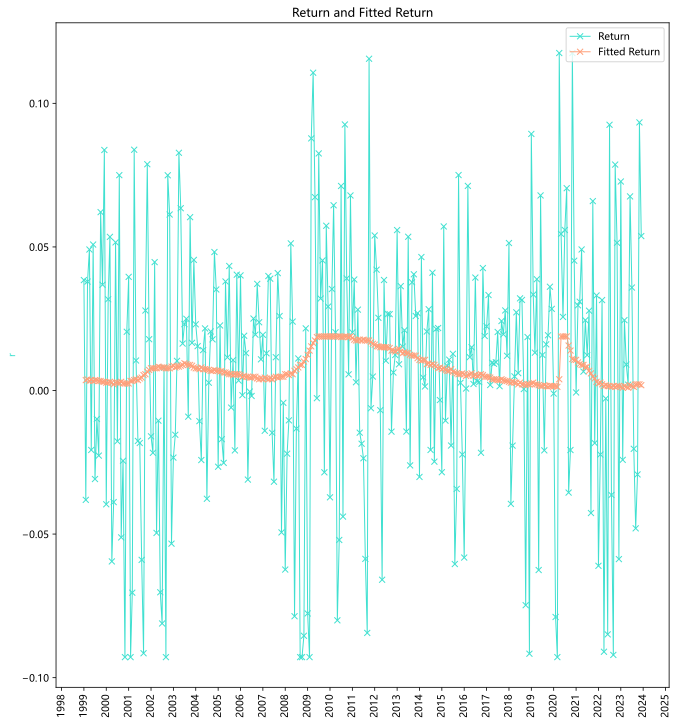

In [24]:
data_fit2 = data_UNRATE.copy()
data_fit2['fitted_return'] = model_unrate.fittedvalues

fig, ax1 = plt.subplots(figsize=(11, 12))
ax1.plot(data_fit2['r'],
            label='Return',
            color='turquoise',
            linewidth=1,
            linestyle='-',
            marker='x')
ax1.plot(data_fit2['fitted_return'],
            label='Fitted Return',
            color='lightsalmon',
            linewidth=1,
            linestyle='-',
            marker='x')


ax1.set_ylabel('r', color='turquoise')
data_format2 = mdates.DateFormatter('%Y')
ax1.xaxis.set_major_formatter(data_format2)
ax1.xaxis.set_major_locator(mdates.YearLocator())

plt.xticks(rotation=90)
plt.title('Return and Fitted Return')
plt.legend(loc='upper right')
fig = plt.gcf()
fig.savefig('return1.svg', bbox_inches='tight')
plt.show()

## 分析
美国的失业率与股票市场收益率存在显著的正相关关系，其主要原因可能有：失业率上升通常意味着经济处于下行阶段或面临一定困境，市场预期政府和央行将采取刺激经济的政策，如降息、量化宽松等。这些政策预期会提升市场的流动性和企业的盈利预期，从而推动股票市场收益率上升；失业率上升可能促使经济进行结构调整，一些效率低下或竞争力不足的企业会被淘汰，而具有创新能力和竞争力的企业则能够存活并发展壮大。这种行业结构的优化会提高整个市场的资源配置效率，提升股票市场的整体收益率；当失业率上升时，债券等固定收益类资产的吸引力可能会下降，投资者为了追求更高的回报，会将资金从债券等市场转移到股票市场。

In [25]:
dataframes = [data_new, data1,data2]
data = reduce(lambda left, right: pd.merge(left, right, on='Day'), dataframes)
data

,r,CPI,UNRATE
Day,,,
1999-01-01,0.038447,0.244051,4.3
1999-02-01,-0.038083,0.121729,4.4
1999-03-01,0.037925,0.303951,4.2
1999-04-01,0.049092,0.727273,4.3
1999-05-01,-0.020708,0.209868,4.2
...,...,...,...
2023-08-01,-0.020300,0.436716,3.8
2023-09-01,-0.048003,0.248513,3.8
2023-10-01,-0.029225,-0.038338,3.8


#   联合回归
将CPI以及失业率数据对股票市场收益率进行联合OLS回归

In [32]:
data['lcpi'] = data['CPI'].shift(1)
data['lunrate'] = data['UNRATE'].shift(1)
model_all = smf.ols('r ~ lcpi+lunrate',
                 data=data['1999-01':'2023-12']).fit(
                     cov_type='HAC', cov_kwds={'maxlags': 6})
print(model_all.summary())

                            OLS Regression Results                            
Dep. Variable:                      r   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     2.425
Date:                Fri, 20 Dec 2024   Prob (F-statistic):             0.0902
Time:                        12:56:12   Log-Likelihood:                 509.64
No. Observations:                 299   AIC:                            -1013.
Df Residuals:                     296   BIC:                            -1002.
Df Model:                           2                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0074      0.008     -0.908      0.3

Text(0, 0.5, 'r')

(array([ 9862., 10227., 10592., 10957., 11323., 11688., 12053., 12418.,
        12784., 13149., 13514., 13879., 14245., 14610., 14975., 15340.,
        15706., 16071., 16436., 16801., 17167., 17532., 17897., 18262.,
        18628., 18993., 19358., 19723., 20089.]),
 [Text(9862.0, 0, '1997'),
  Text(10227.0, 0, '1998'),
  Text(10592.0, 0, '1999'),
  Text(10957.0, 0, '2000'),
  Text(11323.0, 0, '2001'),
  Text(11688.0, 0, '2002'),
  Text(12053.0, 0, '2003'),
  Text(12418.0, 0, '2004'),
  Text(12784.0, 0, '2005'),
  Text(13149.0, 0, '2006'),
  Text(13514.0, 0, '2007'),
  Text(13879.0, 0, '2008'),
  Text(14245.0, 0, '2009'),
  Text(14610.0, 0, '2010'),
  Text(14975.0, 0, '2011'),
  Text(15340.0, 0, '2012'),
  Text(15706.0, 0, '2013'),
  Text(16071.0, 0, '2014'),
  Text(16436.0, 0, '2015'),
  Text(16801.0, 0, '2016'),
  Text(17167.0, 0, '2017'),
  Text(17532.0, 0, '2018'),
  Text(17897.0, 0, '2019'),
  Text(18262.0, 0, '2020'),
  Text(18628.0, 0, '2021'),
  Text(18993.0, 0, '2022'),
  Text(

Text(0.5, 1.0, 'Return and Fitted Return')

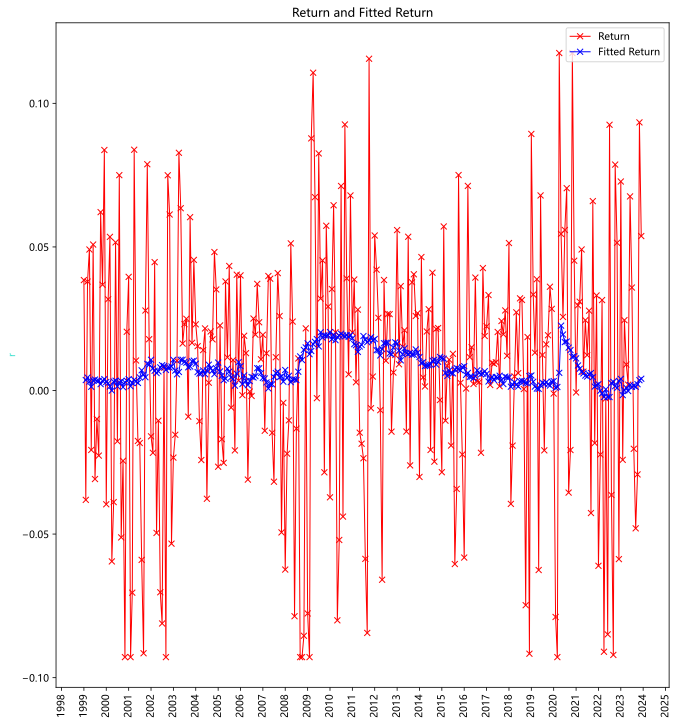

In [36]:
data_fit_all = data.copy()
data_fit_all['fitted_return'] = model_all.fittedvalues

fig, ax1 = plt.subplots(figsize=(11, 12))
ax1.plot(data['r'],
            label='Return',
            color='red',
            linewidth=1,
            linestyle='-',
            marker='x')
ax1.plot(data_fit_all['fitted_return'],
            label='Fitted Return',
            color='blue',
            linewidth=1,
            linestyle='-',
            marker='x')


ax1.set_ylabel('r', color='turquoise')
data_format2 = mdates.DateFormatter('%Y')
ax1.xaxis.set_major_formatter(data_format2)
ax1.xaxis.set_major_locator(mdates.YearLocator())

plt.xticks(rotation=90)
plt.title('Return and Fitted Return')
plt.legend(loc='upper right')
fig = plt.gcf()
fig.savefig('return1.svg', bbox_inches='tight')
plt.show()

In [34]:
from statsmodels.iolib.summary2 import summary_col

info_dict={'No. observations' : lambda x: f"{int(x.nobs):d}"}

results_table = summary_col(results=[model_unrate,model_cpi,model_all],
                            float_format='%0.3f',
                            stars = True,
                            model_names=['Model 1',
                                         'Model 2',
                                         'Model 3'],
                            info_dict=info_dict,
                            regressor_order=['Intercept',
                                             'lcpi',
                                             'lunrate'])

results_table.add_title('Table - OLS Regressions: Forecast Stock Market Return')

print(results_table)

Table - OLS Regressions: Forecast Stock Market Return
                 Model 1 Model 2  Model 3
-----------------------------------------
Intercept        -0.009  0.009*** -0.007 
                 (0.008) (0.003)  (0.008)
lcpi                     -0.006   -0.005 
                         (0.007)  (0.008)
lunrate          0.003**          0.003**
                 (0.001)          (0.001)
R-squared        0.014   0.003    0.016  
R-squared Adj.   0.011   -0.001   0.009  
No. observations 299     299      299    
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01


结果与单独回归大致相同，CPI的回归结果不显著，失业率对股票收益率有显著的正相关关系